<a href="https://colab.research.google.com/github/abdulwahab94/Marriot-Customer-Reviews/blob/main/Marriot_Customer_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
### In the following, I will write a simple code in Python to extract customers reviews from trustpilot and analyse them. The idea is to simply extract the
### reviews text and perform NLP analysis using polarity and subjectivity to calculate the overall sentiment.
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import re
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
url='https://uk.trustpilot.com/review/marriot.it'
url_open=urlopen(url)
html_read=url_open.read()
url_open.close()
#my_text=[]
html_page=soup(html_read,'html.parser')
text_initial_container=html_page.findAll('p',{'class':'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'})
text_container=text_initial_container[0]
file_name='sentiment_analysis.csv'
f=open(file_name,'w')
headers='Polarity, Subjectivity, Sentiment(positve/negative)\n'
f.write(headers)

for text_container in text_initial_container:
    my_text=text_container.text
    ob = TextBlob(my_text)
    polarity_container=ob.sentiment.polarity
    subjectivity_container=ob.sentiment.subjectivity
    print(my_text)
    print('Polarity: ',ob.sentiment.polarity)
    print('subjectivity: ',ob.sentiment.subjectivity)
    if polarity_container>0:
        final_sentiment_container='Positive'
    elif polarity_container==0:
        final_sentiment_container='Neutral'
    else:
        final_sentiment_container='Negative'
    #float to string conversion for concatenation of strings in output representation
    f.write(str(polarity_container) + ',' + str(subjectivity_container) + ',' + final_sentiment_container + '\n')
f.close()
df=pd.read_csv('sentiment_analysis.csv')

This hotel exuded a premium atmosphere with courteous staff and a generally positive first impression. However, my stay was marred by a couple of significant drawbacks.The room I was assigned had multiple brown stains on the carpet, which appeared to be coffee. When I reported this to guest services, the representative was very apologetic and offered me a choice of two alternative rooms. Unfortunately, both of these rooms also had similar stains on the carpet.Additionally, the water pressure in the shower was surprisingly weak, which did not meet my expectations for a premium hotel. Given the £190 per night rate, I was disappointed to encounter these issues.Despite the hotel's plush ambiance and pleasant staff, the stained carpets and weak shower pressure significantly detracted from my stay. Due to these factors, I am unlikely to recommend Courtyard By Marriott in Inverness to others.
Polarity:  0.009040404040404026
subjectivity:  0.6113636363636364
THIS HOTEL CHAIN BOOKS ROOMS AND DO

In [14]:
df=pd.read_csv('sentiment_analysis.csv')
df.head()

,Polarity,Subjectivity,Sentiment(positve/negative)
0,0.009040,0.611364,Positive
1,-0.163542,0.183333,Negative
2,-0.263095,0.484524,Negative
3,-0.358333,0.812500,Negative
4,0.185714,0.257143,Positive


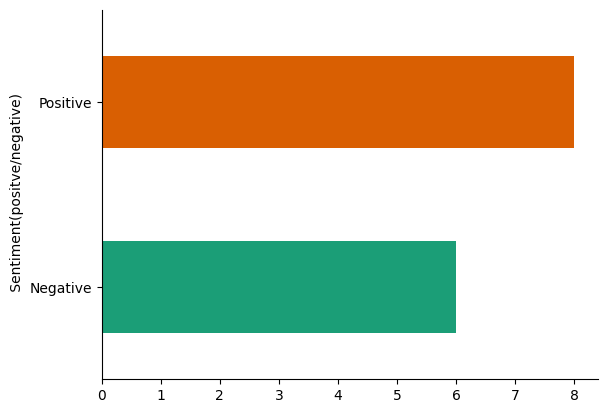

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby(' Sentiment(positve/negative)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)